In [2]:
##Logan Lauton
##Exploratory Data Analysis

##importing required packages for this exploratory data analysis
import requests
import oracledb
import getpass
import cx_Oracle
import os
import pandas as pd
import matplotlib.pyplot as plt

##connecting to the db as we did in grab_data.ipynb
password = getpass.getpass("Enter DB Password")
wallet_password = getpass.getpass("Enter Wallet Password")

os.environ.get('TNS_ADMIN')
connection = oracledb.connect(
    user="admin",
    password=password,
    dsn = "ltl3y0m4d7of29l1_high",
    config_dir="./config",
    wallet_location="./config",
    wallet_password=wallet_password)
print("Successfully connected to Oracle Database")

cursor = connection.cursor()

##selecting everything from the calls table and creating a df
rs = cursor.execute("SELECT * FROM CALLS")
df = pd.DataFrame(rs.fetchall())
print('Successfully imported table from Oracle Database')

Enter DB Password········
Enter Wallet Password········
Successfully connected to Oracle Database
Successfully imported table from Oracle Database


In [64]:
##properly naming the columns
df.columns = ['Call Number' , 'Date/Time' , 'Address' , 'District' , 'Nature of Call' , 'Status' , 'Latitude' , 'Longitude']
df.

ValueError: Length mismatch: Expected axis has 8 elements, new values have 9 elements

In [102]:
import censusgeocode as cg 

df_head =  df.head()

result = cg.coordinates(x=df_head['Longitude'][1], y=df_head['Latitude'][1])
result = result['Census Tracts']
df_head['GEOID'] = ''
df_head['GEOID'][1] = result[0]['GEOID']


df_head['GEOID'] = df_head.apply(lambda x : cg.coordinates(x=x['Longitude'], y=x['Latitude'])['Census Tracts'][0]['GEOID'], axis = 1)

import time

/home/logan/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/logan/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/logan/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,Call Number,Date/Time,Address,District,Nature of Call,Status,Latitude,Longitude,GEOID
0,230311239,01/31/2023 04:42:12 PM,"N 35TH ST / W PARK HILL AV,MKE",3,ACC PI,Service in Progress,43.085368,-87.957141,55079004700
1,230311241,01/31/2023 04:42:05 PM,"2222 S 37TH ST,MKE",2,INVESTIGATION,Assignment Completed,43.004218,-87.960256,55079017200
2,230311230,01/31/2023 04:39:09 PM,"212 W WISCONSIN AV,MKE",1,SUSP PERS/AUTO,Unable to Locate Complainant,43.039249,-87.913401,55079186300
3,230311236,01/31/2023 04:38:12 PM,"4204 W CAPITOL DR,MKE",7,TRAFFIC STOP,Advised,43.089974,-87.965580,55079004100
4,230311235,01/31/2023 04:36:54 PM,"N TEUTONIA AV / W VILLARD AV,MKE",7,INVESTIGATION,Assignment Completed,43.071124,-87.930350,55079008500


In [127]:
import censusgeocode as cg

for i in range(100):
        result = cg.coordinates(x=df_100['Longitude'][i], y=df_100['Latitude'][i])
        result = result['Census Tracts']
        df_100['GEOID'] = ''
        df_100['GEOID'][i] = result[0]['GEOID']
        print(i)
    
df_100


/home/logan/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/logan/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


ValueError: Unable to parse response from Census

In [133]:
df_100[65:67]

,Call Number,Date/Time,Address,District,Nature of Call,Status,Latitude,Longitude,GEOID
65,230321125,02/01/2023 06:49:55 PM,"N 76TH ST / W FLORIST AV,MKE",4,ACC PDO,Unable to Locate Complainant,43.179828,-88.004737,55079000101
66,230321437,02/01/2023 06:49:49 PM,4200 W HAMPTO NVE,SPD,TRAFFIC STOP,Assignment Completed,NaN,NaN,


In [141]:
df.dropna(inplace = True)
df_100 = df[0:100]

In [124]:
df_100[0:2]

,Call Number,Date/Time,Address,District,Nature of Call,Status,Latitude,Longitude,GEOID
0,230311239,01/31/2023 04:42:12 PM,"N 35TH ST / W PARK HILL AV,MKE",3,ACC PI,Service in Progress,43.085368,-87.957141,
1,230311241,01/31/2023 04:42:05 PM,"2222 S 37TH ST,MKE",2,INVESTIGATION,Assignment Completed,43.004218,-87.960256,


In [148]:
import time
import censusgeocode as cg


In [151]:
df_100 = df[0:100]
#df_100['GEOID'] = ''

df_100['GEOID'] = df_100.apply(lambda x : cg.coordinates(x=x['Longitude'], y=x['Latitude'])['Census Tracts'][0]['GEOID'], axis = 1)

df_100

/home/logan/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Call Number,Date/Time,Address,District,Nature of Call,Status,Latitude,Longitude,GEOID
0,230311239,01/31/2023 04:42:12 PM,"N 35TH ST / W PARK HILL AV,MKE",3,ACC PI,Service in Progress,43.085368,-87.957141,55079004700
1,230311241,01/31/2023 04:42:05 PM,"2222 S 37TH ST,MKE",2,INVESTIGATION,Assignment Completed,43.004218,-87.960256,55079017200
2,230311230,01/31/2023 04:39:09 PM,"212 W WISCONSIN AV,MKE",1,SUSP PERS/AUTO,Unable to Locate Complainant,43.039249,-87.913401,55079186300
3,230311236,01/31/2023 04:38:12 PM,"4204 W CAPITOL DR,MKE",7,TRAFFIC STOP,Advised,43.089974,-87.965580,55079004100
4,230311235,01/31/2023 04:36:54 PM,"N TEUTONIA AV / W VILLARD AV,MKE",7,INVESTIGATION,Assignment Completed,43.071124,-87.930350,55079008500
...,...,...,...,...,...,...,...,...,...
97,230310977,01/31/2023 02:20:59 PM,"N 52ND ST / W CENTER ST,MKE",3,STOLEN VEHICLE,Service in Progress,43.154138,-87.976602,55079000700
98,230310984,01/31/2023 02:20:21 PM,"3626 W FOND DU LAC AV,MKE",7,SPECIAL ASSIGN,Service in Progress,43.076747,-87.958838,55079004800
99,230310983,01/31/2023 02:20:20 PM,"3835 N 27TH ST,MKE",5,TRAFFIC STOP,Advised,43.087014,-87.947376,55079004700
100,230310981,01/31/2023 02:19:21 PM,"4300 W OKLAHOMA AV,MKE",6,TRAFFIC STOP,Advised,42.988436,-87.968050,55079019000


In [4]:
df.to_csv('Tableau_data_2_26_23.csv', index = True)

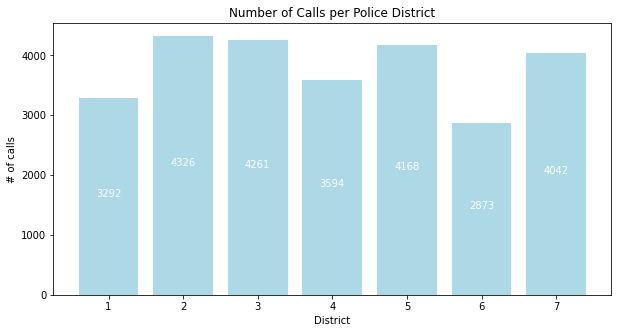

In [3]:
##counting occurrences of District in the df
occur = df.groupby(['District']).size()

##creating my x and y variables for a basic bar chart
##x is the district number
##y is the number of calls that occurs shown above
x = [1 , 2 , 3 , 4 , 5 , 6 , 7]
y = occur[0:7]
 
##function to add value labels to bar chart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i+1, y[i]//2, y[i], ha = 'center', color = 'white')    
        
##building basic bar chart        
plt.figure(figsize = (10,5))
plt.bar(x , y , color = 'lightblue')
plt.title('Number of Calls per Police District')
plt.xlabel('District')
plt.ylabel('# of calls')

##using function to add numbers to plot
addlabels(x , y)

##showing the final plot
plt.show()

Still need to add the labels to graph below 

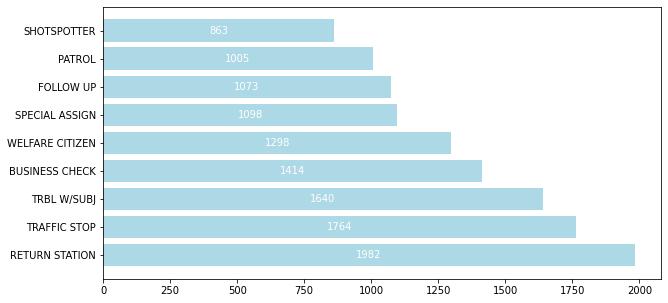

In [9]:
##gathering the number of occurences of specific crimes
occur_noc = df.groupby(['Nature of Call']).size()
##sorting the occurences in descending order
occur_noc = occur_noc.sort_values(ascending = False)
##placing the data into a df
noc_occur = pd.DataFrame(occur_noc)
##properly naming the column
noc_occur.columns = ['Number of Occurences']

##creating my x and y variables for a basic bar chart
##x is the Occurence Type
##y is the number of calls that occurs shown above
x_noc = list(noc_occur[0:9].index.values)
for i in list(noc_occur[0:9]):
    # show the list of values  
    y_noc = noc_occur[i].tolist()

##building basic bar chart  
fig, ax = plt.subplots(figsize = (10,5))
bars = ax.barh(x_noc , y_noc[0:9], color = 'lightblue')

for i in ax.containers:
    ax.bar_label(bars, label_type = 'center', color = 'white')

##showing the final plot
plt.show()

In [12]:
occur_noc.to_csv('Nature of Calls.csv')

In [3]:
##Test to determine ethical considerations - Logan
##On February 7th, 2023 at appriximately 1:15am Milwaukee Police Officer 
##Peter Jerving was shot and killed in action. This is test is to determine 
##if we are able to find the call that he responded to earlier in the night
##and if we are able to what ethical quesitons need to be asked regarding 
## that.

##removing all non-district 4 calls as that was Officer Jerving's precinct
ethic = df.drop(df[df.District != '4'].index)

##seperation of Date & Time into seperate columns to go off of reports from
##media channels
ethic['Date'] = ethic['Date/Time'].str.split('\s+').str[0]
ethic['Time'] = ethic['Date/Time'].str.split('\s+').str[1]

##selecting only the 6th and 7th of Feb as this was the time frame that
##officer Jerving would be responding to a call
ethic_06 = ethic[(ethic.Date == '02/06/2023')]
ethic_07 = ethic[(ethic.Date == '02/07/2023')]
ethic = ethic_06
ethic = ethic.append(ethic_07)


##according to https://news.yahoo.com/news/milwaukee-police-officer-shot-killed-191640738.html?guccounter=1&guce_referrer=aHR0cHM6Ly9kdWNrZHVja2dvLmNvbS8&guce_referrer_sig=AQAAAJDKo_69SdT2K6T9yiBd87LklJWdolHnCY67y_FcvJNjnuM2JagHigHu8ORBmVOR37CNW5tV4QEiDZze6On-D1Z9JLth3jgL3vzTm5iFkuOIiSm0vbEJ4gq2W5TG5a_aU9VnsPLTn2iU_qCpBzjqxxDLSMBeGhYuMGdC-9a2kvTF
##Officers were responding to the area of the 2700 block of 
##South 14th Street to check for a man wanted in connection with a robbery 
##that occurred at 11:25 a.m. Monday in the 3600 block of West Good Hope 
##Road.

##as we can see Call Number 230371702 has the address of 3632 W GOOD HOPE RD
##and the nature of call is a robbery, implying that this is the call that 
##officer Jerving responded too.
Officer_Jerving = ethic[(ethic['Call Number'] == '230371702')]

##I will export the csv of the ethic df to further investigate the logs
##and will determine if any further code/cleaning is needed.
ethic.to_csv('Ethical Issues.csv', index = True)

##after exporting and reviewing the csv I, Logan Lauton, have determined 
##that there was only one relevant call log, labeled above as 
##Officer_Jerving. I will discuss further with Dr. Michael Zimmer to
##determine where to go forward, and whether or not to share the csv in the
##git repo.

##All good 

In [64]:
##importing required packages for this exploratory data analysis
import requests
import oracledb
import getpass
import cx_Oracle
import os
import pandas as pd
import matplotlib.pyplot as plt

##connecting to the db as we did in grab_data.ipynb
password = getpass.getpass("Enter DB Password")
wallet_password = getpass.getpass("Enter Wallet Password")

os.environ.get('TNS_ADMIN')
connection = oracledb.connect(
    user="admin",
    password=password,
    dsn = "ltl3y0m4d7of29l1_high",
    config_dir="./config",
    wallet_location="./config",
    wallet_password=wallet_password)
print("Successfully connected to Oracle Database")

cursor = connection.cursor()

##selecting everything from the calls table and creating a df
rs = cursor.execute("SELECT * FROM HISTORIC_REAL_ESTATE")
df_red = pd.DataFrame(rs.fetchall())
print("Successfully imported data")

##replacing names of columns
df_red.columns =['PropertyID','PropType','Address','District','Sale_date','Sale_price']

##exporting as there is 56,000+ values which makes it incredibly difficult in terms of time complexity
##df_red.to_csv('Historic_RealEstate_Data.csv', index = True)

Enter DB Password········
Enter Wallet Password········
Successfully connected to Oracle Database
Successfully imported data


In [87]:
import pandas as pd
import numpy as np
import logging
from geopy.geocoders import Nominatim
import time


# Define functions for geolocation
geolocator = Nominatim(user_agent="MU-DS-Capstone")
def fix_address(address):
    #Error catching
    #Not-string error
    address = str(address)
    # Remove city
    if "," in address:
        address = address[:address.index(",")].strip()
    # If intersection, just use first street. TODO: Improve this
    if "/" in address:
        address = address[:address.index("/")].strip()
    # Remove NA values
    if pd.isna(address):
        address = np.nan
    # Change block address to just be that address number
    address = address.replace("-BLK", "")
    # Catching the BLVD error, needs to say BLVD not BL
    if address.endswith("BL"):
        address += "VD"
    # Catching MLK DR error, use old name
    address = address.replace("MARTIN L KING JR DR", "OLD WORLD THIRD ST")
    # Layton Error
    address = address.replace("S LAYTON ST", "S LAYTON BLVD")
    # Leon Error
    address = address.replace("LEON TR", "LEON TERRACE")
    # Mc Kinley Error
    address = address.replace("MC KINLEY", "MCKINLEY")
    # W Fond Du Lac Error
    if "FOND DU LAC" in address and "AV" not in address:
        address = address.replace("FOND DU LAC", "FOND DU LAC AV")
    # Bluemound road error
    address = address.replace("BLUE MOUND RD", "BLUEMOUND RD")        
    return address + " MILWAUKEE"

def geocode(address):
    try:
        geocoded = geolocator.geocode(address)
        return geocoded
    except Exception as e:
        logging.warning("Error geocoding", e)

def get_gps(geocoded, index):
    if geocoded is None:
        return np.nan
    gps = geocoded[1][index]
    if index == 0 and abs(gps - 43.0389) > 1:
        return np.nan
    elif index == 1 and abs(gps + 87.9065) > 1:
        return np.nan  
    return geocoded[1][index]


    
    
# Add Latitude and Longitude columns to dataframe
print('Fixing Addresses.')
start = time.process_time()
fixed_addresses = df_red.Address.transform(fix_address)
print('Addresses Fixed. Time Elapsed:')
print(time.process_time() - start)

print('Geocoding Addresses.')
start = time.process_time()
geocoded_addresses = fixed_addresses.apply(geocode)
print('Addresses Geocoded. Time Elapsed:')
print(time.process_time() - start)

print('Filling Latitude Column.')
start = time.process_time()
df_red["Latitude"] = geocoded_addresses.apply(get_gps, index=0)
print('Latitiude Column Full. Time Elapsed:')
print(time.process_time() - start)

print('Filling Longitude Column.')
start = time.process_time()
df_red["Longitude"] = geocoded_addresses.apply(get_gps, index=1)
print('Longitude Column Full. Time Elapsed:')
print(time.process_time() - start)

Fixing Addresses.
Addresses Fixed. Time Elapsed:
0.07125030000000265
Geocoding Addresses.


--- Logging error ---
Traceback (most recent call last):
  File "/home/logan/py37/lib/python3.7/site-packages/urllib3/connectionpool.py", line 386, in _make_request
    self._validate_conn(conn)
  File "/home/logan/py37/lib/python3.7/site-packages/urllib3/connectionpool.py", line 1040, in _validate_conn
    conn.connect()
  File "/home/logan/py37/lib/python3.7/site-packages/urllib3/connection.py", line 426, in connect
    tls_in_tls=tls_in_tls,
  File "/home/logan/py37/lib/python3.7/site-packages/urllib3/util/ssl_.py", line 450, in ssl_wrap_socket
    sock, context, tls_in_tls, server_hostname=server_hostname
  File "/home/logan/py37/lib/python3.7/site-packages/urllib3/util/ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "/usr/lib/python3.7/ssl.py", line 423, in wrap_socket
    session=session
  File "/usr/lib/python3.7/ssl.py", line 870, in _create
    self.do_handshake()
  File "/usr/lib/python3.7/ssl.py", 

--- Logging error ---
Traceback (most recent call last):
  File "/home/logan/py37/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/home/logan/py37/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/usr/lib/python3.7/http/client.py", line 1373, in getresponse
    response.begin()
  File "/usr/lib/python3.7/http/client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.7/http/client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.7/ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.7/ssl.py", line 929, in read
    return self._sslobj.read(len, 

Addresses Geocoded. Time Elapsed:
197.5781345
Filling Latitude Column.
Latitiude Column Full. Time Elapsed:
0.09240909999999758
Filling Longitude Column.
Longitude Column Full. Time Elapsed:
0.05395849999999314


In [70]:
new_columns = ['Latitude','Longitude']
df_red.loc[:,new_columns] = pd.DataFrame()

,PropertyID,PropType,Address,District,Sale_date,Sale_price,Latitude,Longitude
0,None,Condominium,1924 N HUBBARD ST,6.0,2011-06,225490.0,NaN,NaN
1,None,Condominium,1550 E ROYALL PL,3.0,2011-06,236750.0,NaN,NaN
2,None,Condominium,3749105 N 88TH ST,5.0,2011-06,57500.0,NaN,NaN
3,None,Condominium,130 S WATER ST,12.0,2011-06,410000.0,NaN,NaN
4,None,Condominium,2302 E WYOMING PL,3.0,2011-06,130000.0,NaN,NaN
...,...,...,...,...,...,...,...,...
59688,None,Residential,3770 S 78TH ST,11.0,2017-04,143155.0,NaN,NaN
59689,None,Residential,3625 S SUNSET DR,11.0,2017-04,127500.0,NaN,NaN
59690,None,Residential,2780 S 64TH ST,11.0,2017-04,141000.0,NaN,NaN
59691,None,Residential,3318 S 73RD ST,11.0,2017-04,135900.0,NaN,NaN


In [89]:
df_red.to_csv('Historic_RealEstate_Data.csv', index = True)